<!--######################################################################################################################################################################################################################################################################################################################################################
-->

(U6)=
# Unidad 6

## Series de Fourier

### Introducción

Las [series de Fourier](https://en.wikipedia.org/wiki/Fourier_series) resultan útiles en incontables aplicaciones actuales, desde la solución de la [ecuación del calor](https://en.wikipedia.org/wiki/Heat_equation), el [procesamiento de señales](https://en.wikipedia.org/wiki/Signal_processing) hasta el [procesamiento digital de imágenes](https://en.wikipedia.org/wiki/Digital_image_processing), pasando por casi cualquier campo en el que el análisis de frecuencias tenga alguna importancia.

Por ejemplo, pueden ayudar a caracterizar y comprender mejor la composición química de las estrellas, o el modo en que el aparato fonador produce el sonido.

Por analogía, podemos entenderlas como una serie de Taylor generalizada, que ya no trabaja con potencias de $x$ sino que con funciones trigonométricas seno y coseno.

### Definición

La idea esencial es que el conjunto 

$$
\left\{1,\cos\left(\dfrac{\pi x}{p}\right),\cos\left(\dfrac{2\pi x}{p}\right),\cos\left(\dfrac{3\pi x}{p}\right),\dots, \sin\left(\dfrac{\pi x}{p}\right), \sin\left(\dfrac{2\pi x}{p}\right), \sin\left(\dfrac{3\pi x}{p}\right),\dots\right\}
$$

forma una base ortogonal para el espacio vectorial de las funciones definidas en el intervalo $]-p,p[$. Luego, $f$ se puede escribir como una combinación lineal *infinita* de estas funciones 

$$
f(x)=c_0f_0(x)+c_1f_1(x)+\cdots+c_nf_n(x)+\cdots
$$

donde la igualdad entre función y serie se debe a la [convergencia uniforme](https://en.wikipedia.org/wiki/Uniform_convergence) de la sucesión de funciones del conjunto ortogonal a $f$, hecho que asumiremos en este curso. 

¿Cómo calcular los coeficientes $c_n$ de dicha serie?

**Definición**: La **serie de Fourier** de una función $f$ definida en el intervalo $]-p,p[$, está dada por: 

$$
f(x)=\dfrac{a_{0}}{2}+\sum_{n=1}^{\infty}\left(a_{n}\cos\left(\dfrac{n\pi}{p}x\right)+b_{n}\sin \left(\dfrac{n\pi}{p}x\right)\right)
$$

donde

\begin{eqnarray*}
a_{0} & = & \dfrac{1}{p}\int_{-p}^{p}f(x)dx\\
a_{n} & = & \dfrac{1}{p}\int_{-p}^{p}f(x)\cos\left(\dfrac{n\pi}{p}x\right)dx\\
b_{n} & = & \dfrac{1}{p}\int_{-p}^{p}f(x)\sin \left(\dfrac{n\pi}{p}x\right)dx
\end{eqnarray*} (Fourier1)

```{admonition} Ejercicio Teórico
Determine la serie de Fourier de $f(x)=x$ en $]-\pi,\pi[$.
```

En Python,

In [1]:
import sympy as sp

def fourier_series(f, p, n_terms=10):
    """
    Calcula el desarrollo en serie de Fourier de una función `f(x)` definida en el intervalo ]-p, p[.

    Args:
        f (sympy expression): La función a desarrollar.
        p (float): El intervalo del desarrollo ]-p, p[.
        n_terms (int): Número de términos de la serie de Fourier.

    Returns:
        sympy expression: La serie de Fourier como una expresión simbólica.
    """
    # Definir la variable simbólica
    x = sp.Symbol('x', real=True)
    
    # Coeficiente a_0
    a0 = (1 / (2 * p)) * sp.integrate(f, (x, -p, p))

    # Coeficientes a_n y b_n
    a_n = lambda n: (1 / p) * sp.integrate(f * sp.cos(n * sp.pi * x / p), (x, -p, p))
    b_n = lambda n: (1 / p) * sp.integrate(f * sp.sin(n * sp.pi * x / p), (x, -p, p))

    # Construir la serie de Fourier
    series = a0 / 2
    for n in range(1, n_terms + 1):
        series += a_n(n) * sp.cos(n * sp.pi * x / p) + b_n(n) * sp.sin(n * sp.pi * x / p)

    # Simplificar la serie
    series = sp.simplify(series)
    return series

# Definir la función f(x) y el intervalo
x = sp.Symbol('x', real=True)
f = x # Función f(x) a desarrollar
p = sp.pi  # Intervalo ]-p, p[

# Llamar a la función para calcular la serie de Fourier
n_terms = 3  # Número de términos de la serie
series = fourier_series(f, p, n_terms)

# Mostrar la serie
display(series)

2*sin(x) - sin(2*x) + 2*sin(3*x)/3

### Convergencia de una serie de Fourier

**Teorema: Condiciones para la convergencia**: Sean $f$ y $f'$ continuas por tramos en $]-p, p[$ excepto en un número finito de puntos en el intervalo y con discontinuidades finitas sólo en esos puntos. Entonces, la serie de Fourier de $f$ en el intervalo converge a $f(x)$ en un punto de continuidad. En un punto de discontinuidad, la serie de Fourier converge hacia el promedio 

$$
\dfrac{f(x^{+})+f(x^{-})}{2}
$$

donde $f(x^{+})$ y $f(x^{-})$ denotan el límite de $f$ en $x$, por la derecha y por la izquierda.

```{admonition} Ejercicio Teórico
Analice la convergencia de la serie de Fourier del ejemplo anterior en $]-\pi,\pi[$.
```

### Extensión periódica

Una serie de Fourier no solo representa la función $f$ en el intervalo $]-p, p[$, sino que también a la extensión periódica de $f$ fuera de este intervalo, debido a la periodicidad (con periodo $2p$) de las funciones seno y coseno involucradas en su desarrollo en serie de Fourier.

```{admonition} Ejercicio Teórico
Determine la serie de Fourier de $f(x)=x$ en $]-\pi,\pi[$. Extienda esta serie periódicamente a todo $\mathbb{R}$ y analice la convergencia de la serie para $f$ en todos sus puntos.
```

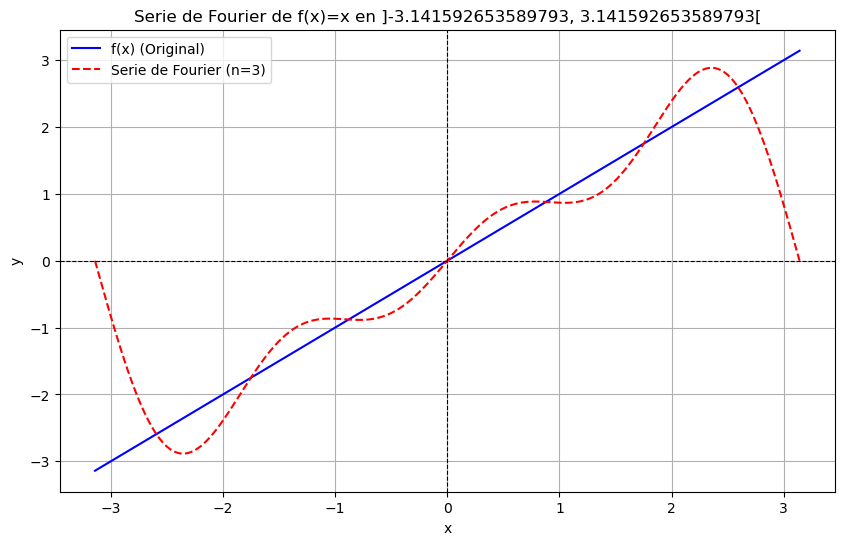

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def plot_fourier(f, p, n_terms=10, num_points=1000):
    """
    Grafica la función original `f(x)` y su desarrollo en serie de Fourier en el intervalo ]-p, p[.

    Args:
        f (sympy expression): La función a desarrollar.
        p (float or sympy expression): El intervalo del desarrollo ]-p, p[.
        n_terms (int): Número de términos de la serie de Fourier.
        num_points (int): Número de puntos para la gráfica.
    """
    # Variables simbólicas
    x = sp.Symbol('x', real=True)
    
    # Calcular la serie de Fourier
    series = fourier_series(f, p, n_terms)
    
    # Convertir las expresiones simbólicas a funciones numéricas
    f_numeric = sp.lambdify(x, f, modules=["numpy"])
    series_numeric = sp.lambdify(x, series, modules=["numpy"])
    
    # Convertir p a un número si es simbólico
    p_numeric = float(p) if isinstance(p, sp.Basic) else p
    
    # Crear puntos para graficar
    x_vals = np.linspace(-p_numeric, p_numeric, num_points)
    f_vals = f_numeric(x_vals)
    series_vals = series_numeric(x_vals)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, f_vals, label='f(x) (Original)', color='blue')
    plt.plot(x_vals, series_vals, label=f'Serie de Fourier (n={n_terms})', color='red', linestyle='--')
    plt.title(f'Serie de Fourier de f(x)={f} en ]-{p_numeric}, {p_numeric}[')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

# Ejemplo de uso
x = sp.Symbol('x', real=True)
f = x  # Función original
p = np.pi  # Intervalo ]-p, p[
n_terms = 3  # Número de términos en la serie de Fourier

plot_fourier(f, p, n_terms)

Note que $a_n=0$ para todo $n=0,1,2,\ldots$ y los únicos coeficientes que aparecen en la serie son los coeficientes $b_n$. ¿Tiene esto alguna razón?

### Serie de Fourier de funciones pares e impares

Si $f$ es una **función par** en el intervalo $]-p, p[$, entonces los coeficientes se pueden evaluar de la siguiente manera:

\begin{eqnarray*}
a_{0} & = & \dfrac{2}{p}\int_{0}^{p}f(x)dx\\
a_{n} & = & \dfrac{2}{p}\int_{0}^{p}f(x)\cos\left(\dfrac{n\pi}{p}x\right)dx\\
b_{n} & = & 0
\end{eqnarray*}

Es decir

$$
f(x)=\dfrac{a_{0}}{2}+\sum_{n=1}^{\infty}a_{n}\cos\left(\dfrac{n\pi}{p}x\right)
$$

De la misma manera, cuando $f$ una **función impar** en el intervalo $]-p,p[$, se tiene que

$$
a_{n}=0, \quad n=0,1,2,3,\ldots, \qquad b_{n}=\dfrac{2}{p}\int_{0}^{p}f(x)\sin\left(\dfrac{n\pi}{p}x\right)dx.
$$

Es decir 

$$
f(x)=\sum_{n=1}^{\infty}b_{n}\sin\left(\dfrac{n\pi}{p}x\right)
$$

### Desarrollo en Semiintervalos

En muchos casos la función $f$ está definida en un intervalo que contiene el origen en el punto medio de él, es decir, en un intervalo del tipo $]-p, p[$. Sin embargo, es de interés representar una función $f$ que está definida sólo para $0<x<L$ con una serie trigonométrica. Esto se puede hacer de muchas formas distintas, dando una definición arbitraria de $f(x)$ para $-L<x<0$. Consideraremos los tres casos más importantes. Si $y=f(x)$ está definida en el intervalo $]0,L[$, entonces:

1. Reflejar la gráfica de $f$ respecto al eje $Y$ en $]-L,0[$; la función ahora es par en $]-L,L[$.

```{figure} Fourier1.png
---
height: 150px
name: Fourier1
---
Desarrollo como Función Par
```

2. Reflejar la gráfica de $f$ respecto al origen en $]-L,0[$; la función ahora es impar en $]-L,L[$.

```{figure} Fourier2.png
---
height: 150px
name: Fourier2
---
Desarrollo como Función Impar
```

3. Definir $f$ en $]-L,0[$ con $y=f(x+L)$.

```{figure} Fourier3.png
---
height: 150px
name: Fourier3
---
Desarrollo mediante una Traslación
```

```{admonition} Ejercicio Aplicado
Considere el movimiento no amortiguado de una masa $m$ en un resorte con constante de resorte $k$ bajo la influencia de una fuerza externa periódica $f(t)$. Sabemos que su desplazamiento $x(t)$ desde su posición de equilibrio satisface la conocida ecuación

$$
mx''(t)+kx(t)=f(t)
$$ 

y su solucón general es de la forma $x(t)=c_1\cos(\omega_0 t)+c_2\sin(\omega_0 t)+x_p(t)$, donde $\omega_0=\sqrt{\dfrac{k}{m}} $ es la frecuencia natural del sistema, y $x_p(t)$ es una solución particular de la ecuación. Los valores de las constantes  $c_1$ y $c_2$ se determinan por las condiciones iniciales. 

Ahora nos interesa utilizar la serie de Fourier para encontrar una solución periódica particular de la ecuación. Ésta se representa por $x_{sp}(t)$, y se conoce como **solución periódica estacionaria**. 

Para simplificar, se considera que $f(t)$ es una función impar con periodo $2L$, de tal manera que su serie de Fourier tiene la forma 

$$
f(t)=\sum_{n=1}^\infty B_n\sin\left(\dfrac{n\pi t}{L}\right)
$$

Si $\dfrac{n\pi}{L}$ no es igual a $\omega_0$ para cualquier entero positivo $n,$ puede determinarse una solución periódica en estado permanente de la forma 

$$
x_{sp}(t)= \sum_{n=1}^\infty b_n\sin\left(\dfrac{n\pi t}{L}\right)
$$

Suponga que $m=2 \, kg, \, k=32\, N/m$ y que $f(t)$ es una fuerza periódica impar con periodo de $2\, seg$ dada en un periodo por 

$$
f(t)=\left\{\begin{array}{ccc}
    +10\,  N & \textrm{si} & 0<t<1\\
    -10\, N  & \textrm{si} & 1<t<2\\
    \end{array}
\right.
$$

Determine el movimiento periódico estacionario $x_{sp}(t).$ 
```